In [86]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [87]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



In [91]:
# Define CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


c:\Users\PRIYA\Documents\annnconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, 
                    epochs=25, 
                    validation_data=(X_test, y_test))


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 0.8447 - loss: 0.4201 - val_accuracy: 0.8664 - val_loss: 0.3686
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.8712 - loss: 0.3444 - val_accuracy: 0.8766 - val_loss: 0.3341
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.8891 - loss: 0.2970 - val_accuracy: 0.8832 - val_loss: 0.3262
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9017 - loss: 0.2634 - val_accuracy: 0.8852 - val_loss: 0.3204
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9106 - loss: 0.2394 - val_accuracy: 0.8895 - val_loss: 0.3173
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9194 - loss: 0.2160 - val_accuracy: 0.8892 - val_loss: 0.3322
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9260 - loss: 0.1971 - val_accuracy: 0.8864 - val_loss: 0.3553
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9318 -

In [94]:
X_train_mnist = X_train_mnist / 255.0
X_train_fashion = X_train_fashion / 255.0
X_test_fashion = X_test_fashion / 255.0


In [95]:
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)
X_train_fashion = X_train_fashion.reshape(-1, 28, 28, 1)
X_test_fashion = X_test_fashion.reshape(-1, 28, 28, 1)


In [96]:
# Define Sobel filter kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])


In [97]:
kernels = {
    'Edge Detection': np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]]),
    'Vertical Lines': np.array([[-1, 2, -1],
                                [-1, 2, -1],
                                [-1, 2, -1]]),
    'Blur': np.array([[1/9, 1/9, 1/9],
                      [1/9, 1/9, 1/9],
                      [1/9, 1/9, 1/9]])
}



In [98]:
def apply_sobel_filter(image):
    img_array = np.array(image, dtype=float)
    height, width = img_array.shape
    
    gradient_x = convolve2d(img_array, sobel_x, mode='same')
    gradient_y = convolve2d(img_array, sobel_y, mode='same')
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    
    gradient_x = (gradient_x - np.min(gradient_x)) / (np.max(gradient_x) - np.min(gradient_x))
    gradient_y = (gradient_y - np.min(gradient_y)) / (np.max(gradient_y) - np.min(gradient_y))
    gradient_magnitude = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))
    
    return gradient_x, gradient_y, gradient_magnitude

In [99]:
def display_results(image, gradient_x, gradient_y, gradient_magnitude):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    axes[0, 1].imshow(gradient_x, cmap='gray')
    axes[0, 1].set_title('Horizontal Edges (Sobel X)')
    axes[0, 1].axis('off')
    axes[1, 0].imshow(gradient_y, cmap='gray')
    axes[1, 0].set_title('Vertical Edges (Sobel Y)')
    axes[1, 0].axis('off')
    axes[1, 1].imshow(gradient_magnitude, cmap='gray')
    axes[1, 1].set_title('Edge Magnitude')
    axes[1, 1].axis('off')
    plt.tight_layout()
    plt.show()


In [100]:
def apply_convolution(image, kernel):
    result = []
    for channel in range(image.shape[2]):
        channel_image = image[:, :, channel]
        convolved_channel = convolve2d(channel_image, kernel, mode='same')
        result.append(convolved_channel)
    return np.stack(result, axis=2)


In [102]:
def show_feature_maps(digit_idx=None):
    if digit_idx is None:
        digit_idx = np.random.randint(0, len(X_train))

    image = X_train[digit_idx]
    digit = y_train[digit_idx]

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle(f'CNN Feature Detection - MNIST Digit: {digit}', fontsize=16)

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    for idx, (name, kernel) in enumerate(kernels.items(), 1):
        axes[0, idx].imshow(kernel, cmap='coolwarm')
        axes[0, idx].set_title(f'Kernel: {name}')
        axes[0, idx].axis('off')

        result = apply_convolution(image, kernel)
        result = (result - result.min()) / (result.max() - result.min())

        axes[1, idx].imshow(result, cmap='gray')
        axes[1, idx].set_title(f'Feature Map')
        axes[1, idx].axis('off')

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

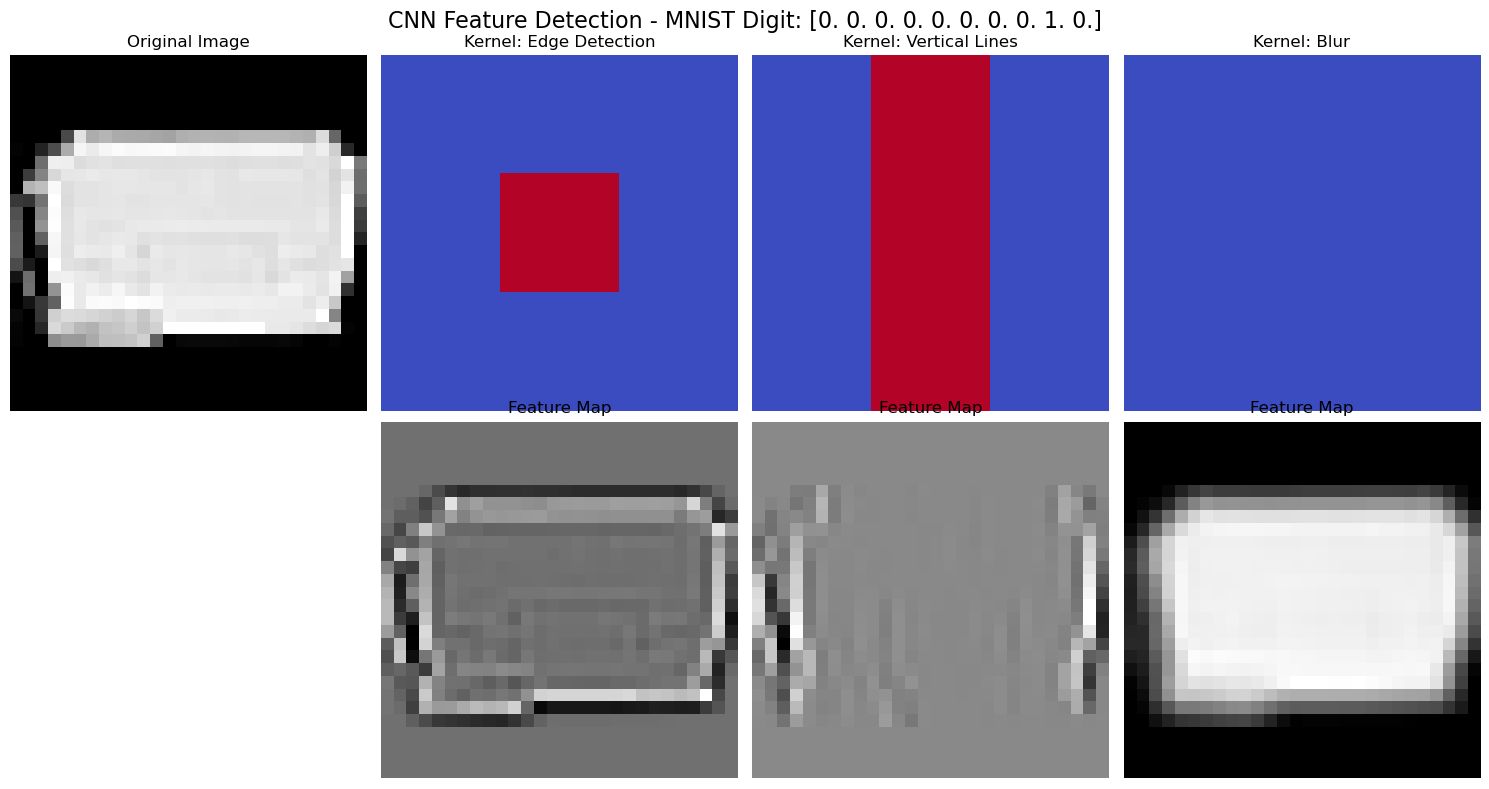

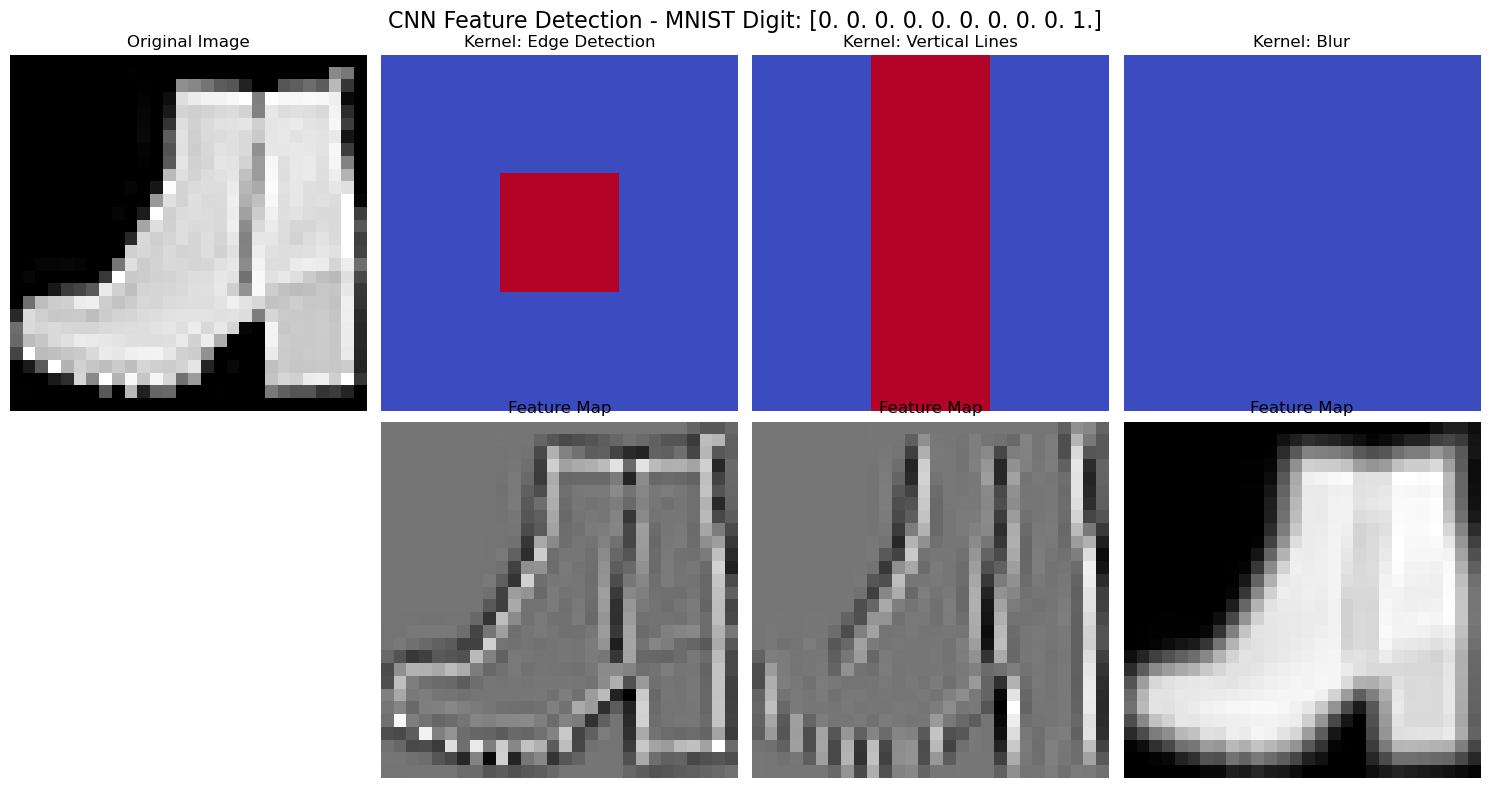

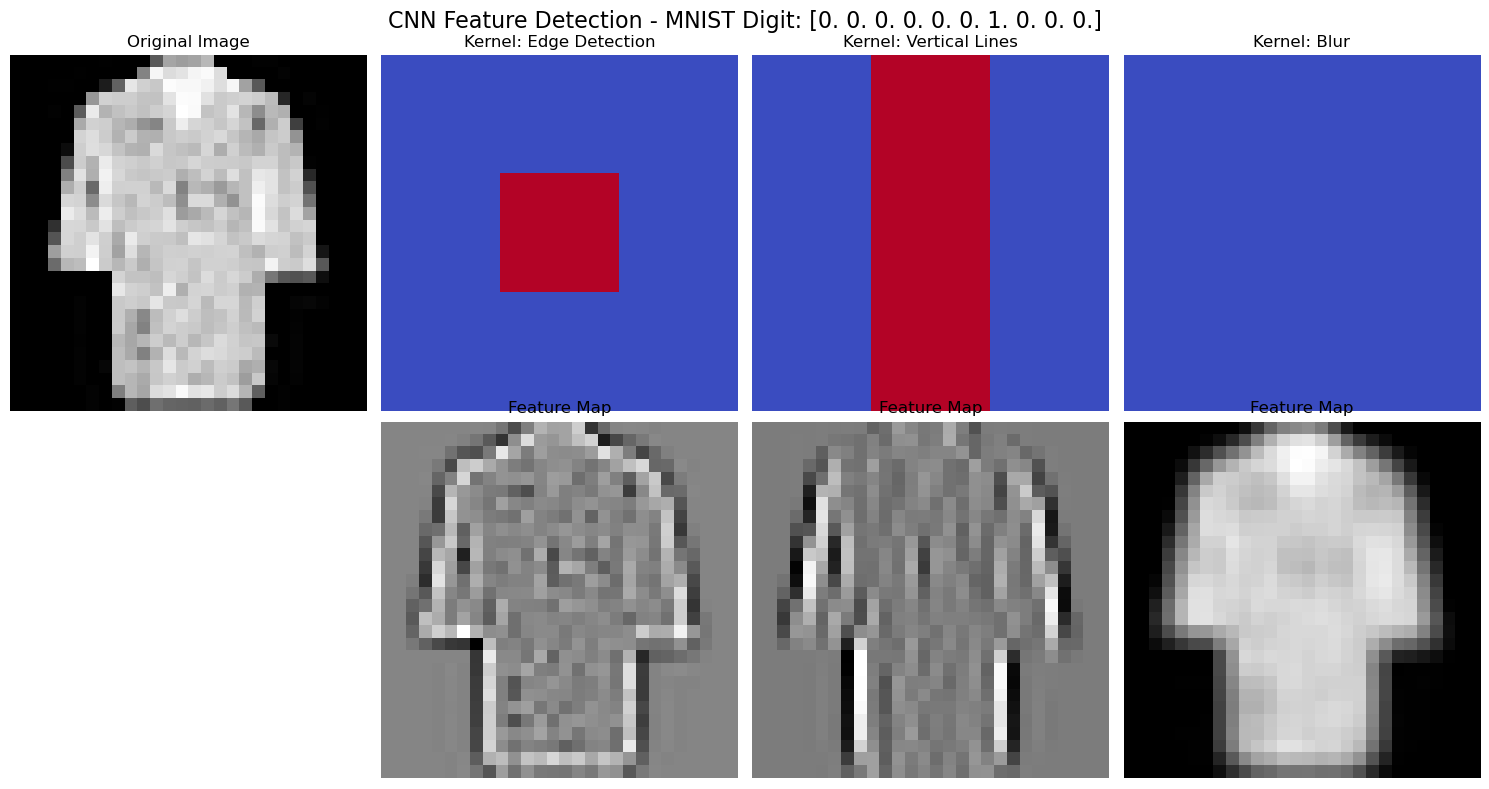

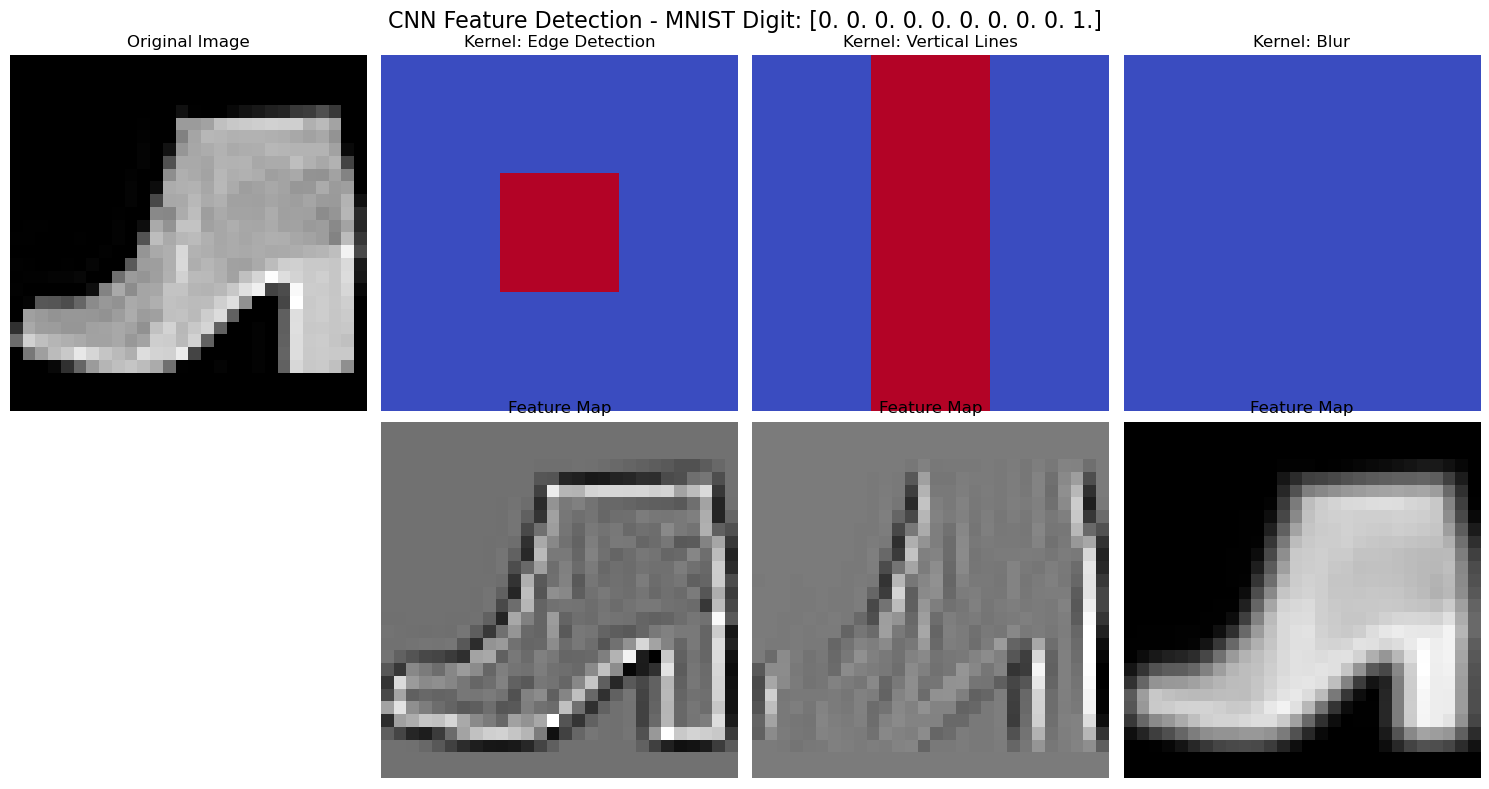

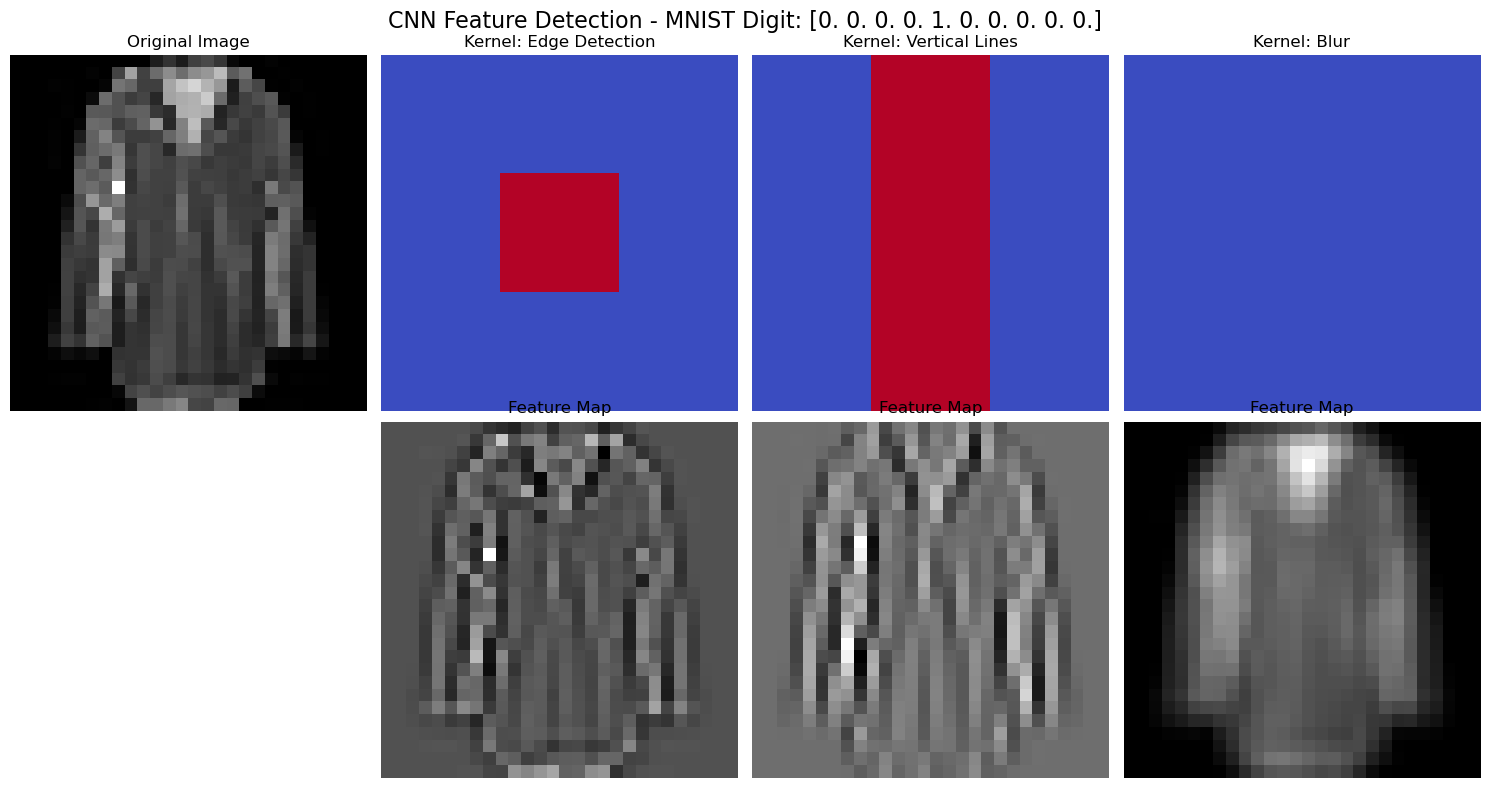

In [103]:
num_examples = 5
while num_examples > 0:
  show_feature_maps()
  time.sleep(2)
  num_examples -= 1



In [104]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8782 - loss: 0.8053
Test accuracy: 0.88


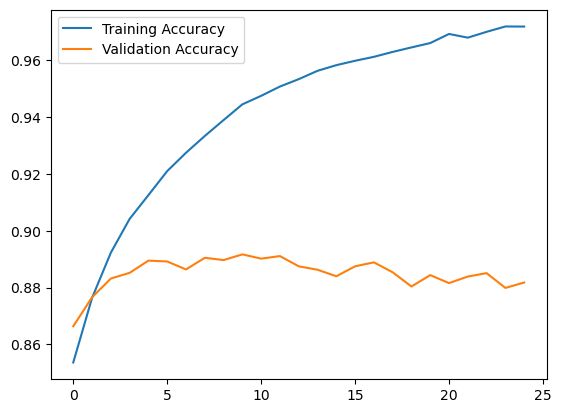

In [105]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

